In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import re,string,unicodedata
from bs4 import BeautifulSoup

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [2]:
dataset = pd.read_csv('imdb-dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


positive    25000
negative    25000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

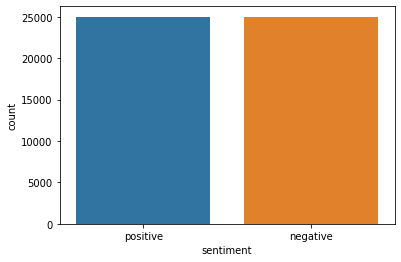

In [3]:
import warnings
warnings.simplefilter('ignore')

display(dataset['sentiment'].value_counts())
sns.countplot(dataset['sentiment'])

In [4]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
tokenizer = ToktokTokenizer()

stopword_list = stopwords.words('english')

In [6]:
i = 0
def preprocess_data(text, is_lower_case=False):
    global i
    ##remove noisy data
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    text = re.sub('\[[^]]*\]', '', text)
    ##remove special charecter
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    
    ##Stemming text
    pstemmer = PorterStemmer()
    text= ' '.join([pstemmer.stem(word) for word in text.split()])
    ##remove stop words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    i += 1
    if i%10000 == 0:
        print(i)
    return filtered_text


#### apply preprocessing

dataset['review']=dataset['review'].apply(preprocess_data)

10000
20000
30000
40000
50000


In [7]:
dataset['review']

0        one review ha mention watch 1 oz episod youll ...
1        wonder littl product film techniqu veri unassu...
2        thought thi wa wonder way spend time hot summe...
3        basic famili littl boy jake think zombi hi clo...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought thi movi right good job wasnt creativ ...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    im go disagre previou comment side maltin thi ...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

In [8]:
le = LabelEncoder()
training_reviews, testing_reviews, training_labels, testing_labels  = train_test_split(dataset['review'].values,dataset['sentiment'].values,test_size = 0.2)
training_labels = le.fit_transform(training_labels)
testing_labels = le.fit_transform(testing_labels)

In [9]:
training_labels

array([0, 1, 0, ..., 1, 0, 0])

In [10]:
tokenizer = Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index
training_sequence = tokenizer.texts_to_sequences(training_reviews)
testing_sequence = tokenizer.texts_to_sequences(testing_reviews)
train_pad_sequence = pad_sequences(training_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
test_pad_sequence = pad_sequences(testing_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
print('Total Unique Words : {}'.format(len(word_index)))

Total Unique Words : 156041


In [11]:
print(train_pad_sequence.shape)
for word in word_index:
    if len(word) > 15:
        print(word)

(40000, 200)
pseudointellectu
environmentalist
bottomofthebarrel
pseudodocumentari
directorscreenwrit
producerdirector
obsessivecompuls
japaneseamerican
semiautobiograph
turnofthecenturi
postrevolutionari
antiauthoritarian
selfcongratulatori
disappointmentth
seventeenyearold
producersdirector
performancesespeci
betterthanaverag
httpwwwpetitiononlinecomgh1215petitionhtml
blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah
trackersjourneymen
iamaseal2yahoocom
screenwriterdirector
counterterrorist
quasidocumentari
moviewithinthemovi
upstairsdownstair
deerintheheadlight
stereotypescountertyp
interrelationship
writerproducerdirector
politicallycorrect
israelipalestinian
straightforwardli
nightonwhitehors
filmwithinthefilm
writersproducersdirector
uncompromisingli
writerdirectoractor
parapsychologist
directorwriterproduc
frankensteinstyl
httpblogmyspacecomlocoformovi
mentallychalleng
characterdevelop
bosniaherzegovina
httpwwwinvocusnet
sexuallytransmit
httpwwwangelfireco

specialagentfoxmuld
mindnumbinghowev
situationsthough
slowlypainfullybut
minorseventhchord
hardboiledsoftboil
salesrentalsthes
selfcenteredsometh
excellentgoodfairpoor
unequivocalhighli
anniversariesbig
goodstepmotherturnedevilstepmoth
happenedneedless
unbelievablekristen
writerdirectortechn
precociouseveryth
assassinationyour
placenonetheless
undemandingperform
horrorslashergor
woodactordirectorwrit
shittttttttttttttti
valentinemerrideth
unconsciousdreamst
frustratinganyway
dvdhttpwwwreplaydvdcoukjoking
communicationsth
charactersunfortun
conniethroughout
performanceanyway
sexdrugsandrocknrol
twitkristofferson
pseudoshakespearean
includedpolanski
diplomatfriendofthefamili
chinesetaiwanesejapanes
crackcocainesnif
mittschnittservic
astrotheologyinfluenc
opportunitieswhen
characteristicsthat
cameramanwilliam
writerproducerto
africanamericanjewish
wherenevermindanayway
thecoffeecoastercombrian
reporterphotograph
dictatorshipsdespit
leftistcommunist
churchillfairfax
hurricanesuperstorm
cli

fallingjumpingrunningdriv
fiveyearoldsspoil
nightmaresalthough
performancejoseph
repertoireoppressiverecess
backgroundlayout
calculatedchaplin
friendsneighborsunit
tragedytimecomedi
entertainingvivian
novelistinexpectationa
missingsuccinctnesssoulor
contentoccasionallymight
postmanturnedmillionairedont
relationshipswithout
criticallyacclaim
indianscommanchero
vicariouslysuccess
stereotypepredic
interestingcredit
individualsanyway
mainstreamhollywood
suckingblockbust
cousinsistermotherpuppi
rentingbuyingwatch
ohbutthatstuffonlyhappenstootherpeopl
ryannevertheless
dancinginthestreet
entertainmentlisten
cinematographyabsoloutley
salvagespaceship
showsparticularli
excitingentertain
pretensionshidden
adolescentilliteratetough
ultimatelycourageoussh
scientificmeanwhil
sabretooth2002bi
nightmarishfrighten
nuclearholocaust
languagenudityadult
unnattractivedistractingli
crawlingonherbackdemon
alleyotherwiseit
waybeforeafterand
disappointmentsth
wrongsurprisingli
toweringbutsimpl
gramercypolygra

In [13]:
embedded_words = {}
with open('glove.6B.200d.txt', encoding='utf8') as file:
    for line in file:
        words, coeff = line.split(maxsplit=1)
        coeff = np.array(coeff.split(),dtype = float)
        embedded_words[words] = coeff

In [14]:
embedding_matrix = np.zeros((len(word_index) + 1,200))
for word, i in word_index.items():
    embedding_vector = embedded_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [15]:
len(word_index), embedding_matrix.shape

(156041, (156042, 200))

In [26]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(len(word_index) + 1, 200,weights=[embedding_matrix],input_length=200,
                            trainable=False),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(128,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l2=0.1)),
                             tf.keras.layers.Dense(128,activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1,activation = tf.nn.sigmoid)])

In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy() , optimizer='Adam' , metrics = 'accuracy')
history = model.fit(
    train_pad_sequence,
    training_labels,
    batch_size=100,
    epochs = 30 ,
    validation_data=(test_pad_sequence,testing_labels))


Epoch 1/30
400/400 [==============================] - 307s 759ms/step - loss: 2.1610 - accuracy: 0.7302 - val_loss: 0.5096 - val_accuracy: 0.7840
Epoch 2/30
400/400 [==============================] - 278s 694ms/step - loss: 0.4853 - accuracy: 0.7950 - val_loss: 0.4562 - val_accuracy: 0.8034
Epoch 3/30
400/400 [==============================] - 277s 694ms/step - loss: 0.4335 - accuracy: 0.8199 - val_loss: 0.4015 - val_accuracy: 0.8323
Epoch 4/30
400/400 [==============================] - 278s 694ms/step - loss: 0.3951 - accuracy: 0.8416 - val_loss: 0.3819 - val_accuracy: 0.8431
Epoch 5/30
400/400 [==============================] - 276s 691ms/step - loss: 0.3677 - accuracy: 0.8548 - val_loss: 0.3779 - val_accuracy: 0.8465
Epoch 6/30
400/400 [==============================] - 276s 691ms/step - loss: 0.3456 - accuracy: 0.8663 - val_loss: 0.3588 - val_accuracy: 0.8510
Epoch 7/30
400/400 [==============================] - 277s 693ms/step - loss: 0.3288 - accuracy: 0.8742 - val_loss: 0.3621 -

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [ ]:
print('Training Accuracy: {}'.format(max(acc)))
print('Validation Accuracy: {}'.format(max(val_acc)))